# Part II - Ford GoBike Data Exploration
## by Simba Pfaira

## Investigation Overview

My main goal is to find relationships between trip count, trip durations, user types and member gender.


## Dataset Overview

This project explores the San Francisco Bay Area Bike Share dataset which contains information about trips taken by riders, their subscription type, their age, their gender, stations of starting and ending trips, duration of trips among other attributes. The dataset contains information on 183412 bike trips and has 16 attributes for each bike trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

# Printing out the dataframe statistics and attributes
print(df.shape)
print(df.info())
df.head().T

(174952, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   start_station_name       174952 non-null  object
 1   end_station_name         174952 non-null  object
 2   user_type                174952 non-null  object
 3   member_gender            174952 non-null  object
 4   bike_share_for_all_trip  174952 non-null  object
 5   duration_min             174952 non-null  int64 
 6   member_age               174952 non-null  int64 
 7   start_day                174952 non-null  object
 8   start_hour               174952 non-null  int64 
 9   end_hour                 174952 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 13.3+ MB
None


,0,1,2,3,4
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
user_type,Customer,Customer,Subscriber,Subscriber,Subscriber
member_gender,Male,Male,Other,Male,Male
bike_share_for_all_trip,No,No,No,Yes,No
duration_min,870,1031,608,26,30
member_age,35,47,30,45,60
start_day,Thursday,Thursday,Thursday,Thursday,Thursday
start_hour,17,12,17,23,23
end_hour,8,5,4,0,0


## Visualizaton 1

### The relationship between user age and number of trips taken
The histogram below depicts a unimodal distribution with the highest number of the people who used the bike sharing system being between 25 and 35 years old.

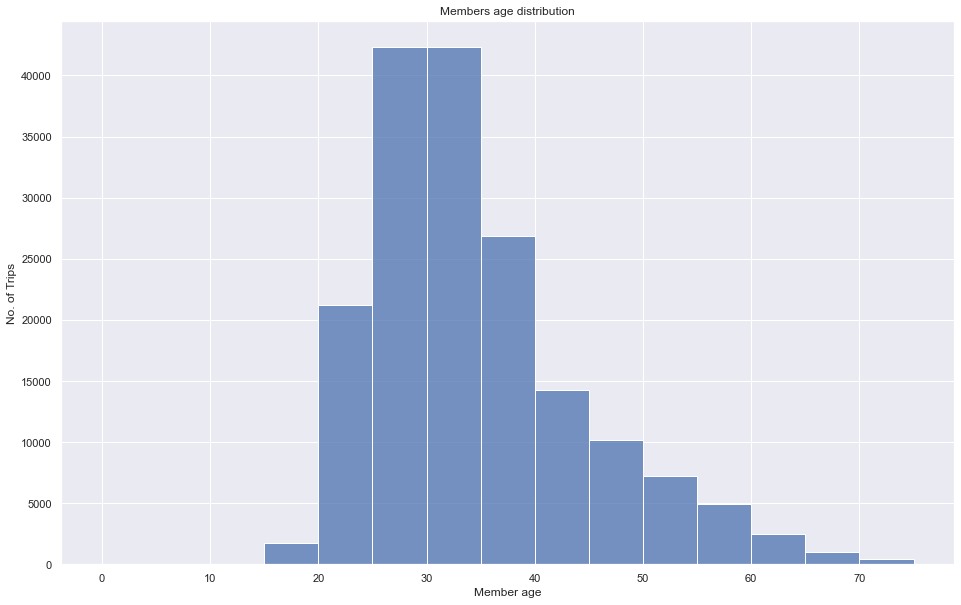

In [23]:
bins = np.arange(0, df['member_age'].max(), 5)
sb.set_theme(style='darkgrid')
plt.figure(figsize = (16,10))
plt.xlabel('Member age')
plt.ylabel('No. of Trips')
plt.title('Members age distribution')
sb.histplot(df['member_age'], bins = bins, color = 'b');

## Visualization 2

### The distribution of trips over the days of the week
From the visualization we can see that most of the trips occurred during the weekdays than the weekends. This is expected as weekdays has more activity than weekends, people going to school, work e.t.c

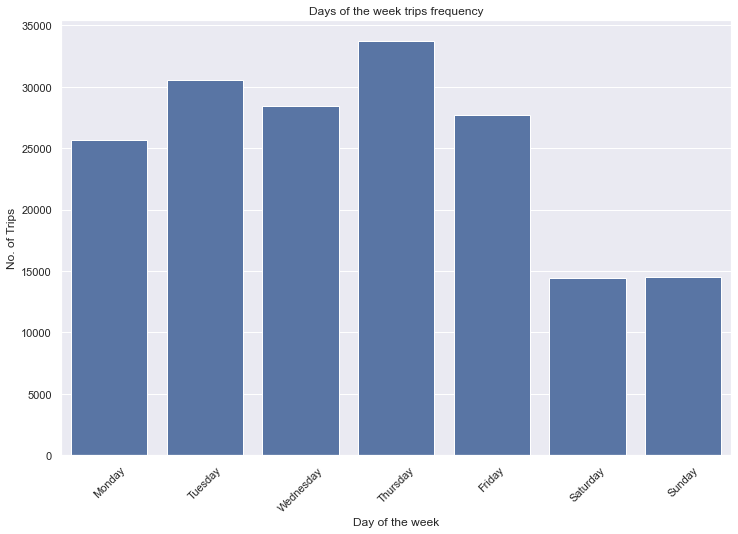

In [29]:
order_of_days =  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.set_theme(style='darkgrid')
plt.figure(figsize = (12,8))
sb.countplot( data = df, x = 'start_day', color='b', order = order_of_days)
plt.xlabel('Day of the week')
plt.ylabel('No. of Trips')
plt.title('Days of the week trips frequency')
plt.xticks(rotation = 45);

# plotVisual('Day of the week', 'No. of Trips', 'Days of the week trips frequency')

## Visualization 3

### The relationship between average trip duration and the day of the week
The average highest duration of the trips are on Saturday and Sunday. This might suggest that people will be taking trips for fun or exercise during the weekend as they be having free time other than the weekdays.

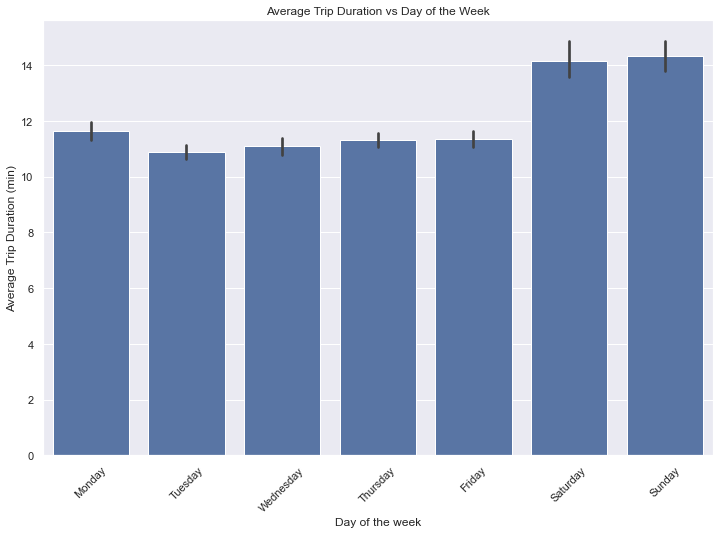

In [31]:
order_of_days =  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.set_theme(style='darkgrid')
plt.figure(figsize = (12,8))
sb.barplot(data = df, x = 'start_day', y ='duration_min', color = 'b', order = order_of_days)
plt.xlabel('Day of the week')
plt.ylabel('Average Trip Duration (min)')
plt.title('Average Trip Duration vs Day of the Week')
plt.xticks(rotation = 45);
#plotVisual('Day of the week', 'Average Trip Duration (min)', 'Average Trip Duration vs Day of the Week');

## Visualization 4

### The relationship between user type and trip duration
From this chart below it shows that the average of the trip duration of customers is clearly greater than the average duration of the subscribers.

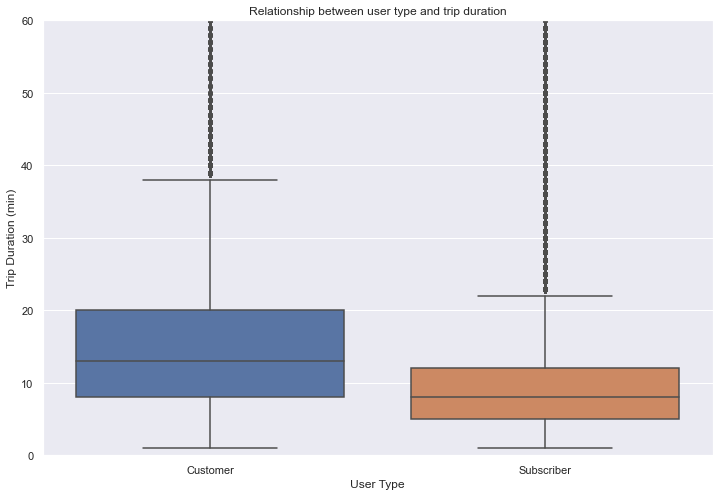

In [33]:
sb.set_theme(style='darkgrid')
plt.figure(figsize = (12,8))
sb.boxplot(data = df, x =  df['user_type'], y = df['duration_min'])
plt.ylim((0,60))
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.title('Relationship between user type and trip duration')
plt.show();

## Visualization 5

### The distribution of trips duration for each gender for each user type
The most trips are between 5-15 minutes and on age of 20-45 years for both customers and subscribers.

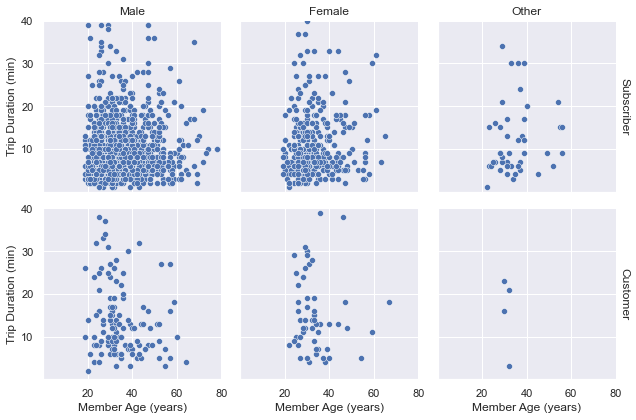

In [12]:
df2 = df.sample(2000)
g = sb.FacetGrid(df2, col="member_gender", row="user_type", margin_titles=True)
g.map_dataframe(sb.scatterplot, x="member_age", y="duration_min")
g.set_axis_labels("Member Age (years)", "Trip Duration (min)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlim=(0, 80), ylim=(0, 35), xticks=[20, 40, 60, 80], yticks=[10, 20, 30, 40])
g.tight_layout()

## Conclusion
The main conclusions that can be inferred from this dataset are-:
* bike trips are mostly short, between 5 or 15 minutes long.
* most of the users are between 20 and 40 years of age.
* the average trip duration during weekends is longer than that during the weekdays.
* customers use the bikes for longer periods than subscribers and the trips usually takes place on weekend.